In [ ]:
!pip install ultralytics

In [ ]:
%cd /content/drive/MyDrive/yolov8
!wget https://github.com/ultralytics/assets/releases/download/v8.2.0/yolov8n.pt

In [ ]:
# Giải nén file data và tổ chức vào thư mục train
# Extract zip data file
%cd /content/drive/MyDrive/yolov8/data/train

!mkdir images
!mkdir labels
!mv *.jpg images
!mv *.xml labels

/content/drive/MyDrive/yolov8/data/train


In [ ]:
%cd /content/drive/MyDrive/yolov8/data/test

!mkdir images
!mkdir labels
!mv *.jpg images
!mv *.xml labels

/content/drive/MyDrive/yolov8/data/test


In [ ]:
%cd /content/drive/MyDrive/yolov8/data
!echo 'train: /content/drive/MyDrive/data/train' >> dataset.yaml
!echo 'test: /content/drive/MyDrive/data/test' >> dataset.yaml
!echo 'nc: 1' >> dataset.yaml
!echo "names: ['firefruit']" >> dataset.yaml

/content/drive/MyDrive/yolov8/data


In [ ]:
%cd /content/drive/MyDrive/yolov8
!yolo task=detect mode=train model=yolov8n.pt data=data/dataset.yaml epochs=200 lr0=0.001 imgsz=800 plots=True

/content/drive/MyDrive/yolov8
Ultralytics YOLOv8.2.18 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=data/dataset.yaml, epochs=200, time=None, patience=100, batch=16, imgsz=800, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train6, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True

In [ ]:
%cd /content/drive/MyDrive/yolov8
import os

image_folder = "/content/drive/MyDrive/yolov8/Image"

# Iterate over the files in the folder
for filename in os.listdir(image_folder):
    if filename.endswith(".jpg"):
        image_path = os.path.join(image_folder, filename)
        # Execute the detection script for each image
        !yolo task=detect mode=predict model=/content/drive/MyDrive/yolov8/runs/detect/train/weights/best.pt conf=0.25 source={image_path} save=True

/content/drive/MyDrive/yolov8
Ultralytics YOLOv8.2.15 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs

image 1/1 /content/drive/MyDrive/yolov8/Image/2020-04-12-11-29-59.jpg: 608x800 12 1s, 56.0ms
Speed: 15.3ms preprocess, 56.0ms inference, 2800.3ms postprocess per image at shape (1, 3, 608, 800)
Results saved to runs/detect/predict2
💡 Learn more at https://docs.ultralytics.com/modes/predict
Ultralytics YOLOv8.2.15 🚀 Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs

image 1/1 /content/drive/MyDrive/yolov8/Image/2020-04-13-07-19-59.jpg: 608x800 6 1s, 61.9ms
Speed: 5.9ms preprocess, 61.9ms inference, 2841.2ms postprocess per image at shape (1, 3, 608, 800)
Results saved to runs/detect/predict3
💡 Learn more at https://docs.ultralytics.com/modes/predict
Ultralytics YOLOv8.2.15 🚀 Python-3.10.12 torch-2.2.1+cu1

In [ ]:
!yolo task=detect mode=predict model=/content/drive/MyDrive/yolov8/runs/detect/train/weights/best.pt conf=0.25 source='/content/drive/MyDrive/yolov8/Video/beevid.mp4' save=True

In [ ]:
%cd /content/drive/MyDrive
!git clone https://github.com/isabek/XmlToTxt.git

/content/drive/MyDrive
Cloning into 'XmlToTxt'...
remote: Enumerating objects: 105, done.
remote: Counting objects: 100% (29/29), done.
remote: Compressing objects: 100% (11/11), done.
remote: Total 105 (delta 21), reused 19 (delta 17), pack-reused 76
Receiving objects: 100% (105/105), 16.68 KiB | 899.00 KiB/s, done.
Resolving deltas: 100% (50/50), done.


In [ ]:
%cd /content/drive/MyDrive/XmlToTxt
!pip install -r requirements.txt

/content/drive/MyDrive/XmlToTxt


In [ ]:
# Move XML files from source folder to destination folder
!mv /content/drive/MyDrive/yolov8/data/train/labels/*.xml /content/drive/MyDrive/XmlToTxt/xml


In [ ]:
!cp /content/drive/MyDrive/XmlToTxt/xml/*.xml /content/drive/MyDrive/yolov8/data/train/labels


In [ ]:
# Move XML files from source folder to destination folder
!cp /content/drive/MyDrive/yolov8/data/validation/labels/*.xml /content/drive/MyDrive/XmlToTxt/xml


In [ ]:
%cd /content/drive/MyDrive/XmlToTxt
!python xmltotxt.py -c classes.txt -xml xml -out out

/content/drive/MyDrive/XmlToTxt


In [ ]:
import torch
import cv2
from ultralytics import YOLO

In [ ]:
model = YOLO('/content/drive/MyDrive/yolov8/runs/detect/train6/weights/best.pt')

In [ ]:
img_path = '/content/drive/MyDrive/yolov8/Image/2020-04-13-08-59-59.jpg'
img = cv2.imread(img_path)

In [ ]:
import numpy

In [ ]:
result = model(img)


0: 608x800 11 1s, 290.7ms
Speed: 6.5ms preprocess, 290.7ms inference, 1.2ms postprocess per image at shape (1, 3, 608, 800)


In [ ]:
print(result[0])

ultralytics.engine.results.Results object with attributes:

boxes: ultralytics.engine.results.Boxes object
keypoints: None
masks: None
names: {0: '1'}
obb: None
orig_img: array([[[76, 84, 97],
        [76, 84, 97],
        [72, 78, 91],
        ...,
        [69, 77, 90],
        [62, 71, 84],
        [66, 75, 88]],

       [[77, 86, 96],
        [74, 83, 93],
        [70, 76, 87],
        ...,
        [71, 79, 92],
        [59, 68, 81],
        [64, 73, 86]],

       [[74, 81, 90],
        [72, 79, 88],
        [72, 79, 88],
        ...,
        [75, 84, 98],
        [68, 75, 90],
        [61, 68, 83]],

       ...,

       [[73, 76, 84],
        [68, 74, 81],
        [69, 75, 82],
        ...,
        [46, 66, 97],
        [42, 64, 92],
        [38, 60, 88]],

       [[69, 74, 83],
        [70, 78, 85],
        [71, 79, 86],
        ...,
        [42, 63, 91],
        [38, 60, 88],
        [36, 58, 86]],

       [[67, 74, 83],
        [69, 76, 85],
        [67, 75, 82],
        ...,
  

In [ ]:
if len(result) > 0:
    first_result = result[0]
    # Now access the boxes attribute
    boxes = first_result.boxes

print(boxes)

ultralytics.engine.results.Boxes object with attributes:

cls: tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])
conf: tensor([0.8068, 0.8055, 0.7958, 0.7951, 0.7836, 0.7699, 0.7683, 0.7647, 0.7562, 0.7504, 0.6419])
data: tensor([[1.3686e+03, 6.5367e+02, 1.7461e+03, 9.6035e+02, 8.0683e-01, 0.0000e+00],
        [1.0363e+03, 9.1927e+02, 1.2772e+03, 1.2165e+03, 8.0550e-01, 0.0000e+00],
        [1.8800e+03, 2.0652e+03, 2.2049e+03, 2.3805e+03, 7.9580e-01, 0.0000e+00],
        [2.0077e+03, 1.8370e+03, 2.2777e+03, 2.1811e+03, 7.9510e-01, 0.0000e+00],
        [1.3503e+03, 1.0066e+03, 1.5363e+03, 1.2697e+03, 7.8357e-01, 0.0000e+00],
        [1.0075e+03, 1.2153e+03, 1.2299e+03, 1.4115e+03, 7.6992e-01, 0.0000e+00],
        [7.5072e+02, 9.6397e+02, 1.0270e+03, 1.1535e+03, 7.6829e-01, 0.0000e+00],
        [1.1500e+03, 1.7403e+03, 1.4010e+03, 1.9681e+03, 7.6473e-01, 0.0000e+00],
        [7.1333e+02, 1.1911e+03, 1.0164e+03, 1.4042e+03, 7.5616e-01, 0.0000e+00],
        [1.0263e+03, 1.4118e+03, 1.28

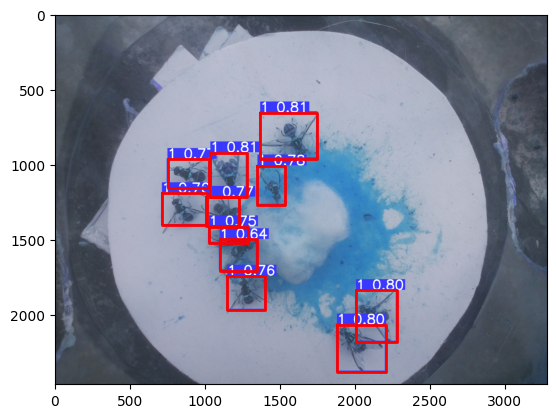

In [ ]:
# prompt: show the result image

import matplotlib.pyplot as plt

# Convert the image to RGB format
image_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Plot the image with bounding boxes
plt.imshow(result[0].plot())

# Iterate through the boxes and draw them on the image
for box in boxes:
    # Get the coordinates of the bounding box
    x1, y1, x2, y2 = box.xyxy[0]

    # Draw the bounding box on the image
    plt.plot([x1, x2, x2, x1, x1], [y1, y1, y2, y2, y1], color='red', linewidth=2)

# Show the image with bounding boxes
plt.show()


In [ ]:
if hasattr(boxes, 'xyxy'):
        bounding_boxes = boxes.xyxy  # This should be the tensor or array containing all bounding boxes
        coordinate = []
        for bbox in bounding_boxes:
            x_min, y_min, x_max, y_max = bbox  # Ensure the unpacking matches the structure
            x_center = (x_min + x_max) / 2
            y_center = (y_min + y_max) / 2
            width = x_max - x_min
            height = y_max - y_min
            coordinate.append([float(x_center), float(y_center)])
            print(f"Bounding Box Center: ({x_center}, {y_center}), Width: {width}, Height: {height}")
        else:
          print("The 'boxes' object does not have an 'xyxy' attribute. Check the structure.")
else:
    print("No results found")

coordinate = numpy.array(coordinate)

Bounding Box Center: (1557.340576171875, 807.0089111328125), Width: 377.5048828125, Height: 306.68670654296875
Bounding Box Center: (1156.744140625, 1067.8746337890625), Width: 240.8919677734375, Height: 297.21490478515625
Bounding Box Center: (2042.456787109375, 2222.814453125), Width: 324.8924560546875, Height: 315.276611328125
Bounding Box Center: (2142.70654296875, 2009.04541015625), Width: 270.0294189453125, Height: 344.1353759765625
Bounding Box Center: (1443.313232421875, 1138.1668701171875), Width: 185.9747314453125, Height: 263.05084228515625
Bounding Box Center: (1118.696533203125, 1313.438232421875), Width: 222.42095947265625, Height: 196.2076416015625
Bounding Box Center: (888.8673095703125, 1058.75390625), Width: 276.29510498046875, Height: 189.56689453125
Bounding Box Center: (1275.478515625, 1854.190185546875), Width: 251.044677734375, Height: 227.8673095703125
Bounding Box Center: (864.8736572265625, 1297.6573486328125), Width: 303.08697509765625, Height: 213.1796875
Bo

In [ ]:
print(coordinate)

[[     1557.3      807.01]
 [     1156.7      1067.9]
 [     2042.5      2222.8]
 [     2142.7        2009]
 [     1443.3      1138.2]
 [     1118.7      1313.4]
 [     888.87      1058.8]
 [     1275.5      1854.2]
 [     864.87      1297.7]
 [     1156.3        1467]
 [     1221.8      1601.4]]


In [ ]:
coord = []
# Iterate over each detected object
for res in result:
    for box in res.boxes:
        # Extract the bounding box coordinates
        x_min, y_min, x_max, y_max = box.xyxy.tolist()[0]

        # Calculate the center of the bounding box
        center_x = (x_min + x_max) / 2
        center_y = (y_min + y_max) / 2
        coord.append([float(center_x), float(center_y)])
        # Print or store the center coordinates

coord = np.array(coord)
print(coord)
print(type(coord))

[[     1557.3      807.01]
 [     1156.7      1067.9]
 [     2042.5      2222.8]
 [     2142.7        2009]
 [     1443.3      1138.2]
 [     1118.7      1313.4]
 [     888.87      1058.8]
 [     1275.5      1854.2]
 [     864.87      1297.7]
 [     1156.3        1467]
 [     1221.8      1601.4]]
<class 'numpy.ndarray'>


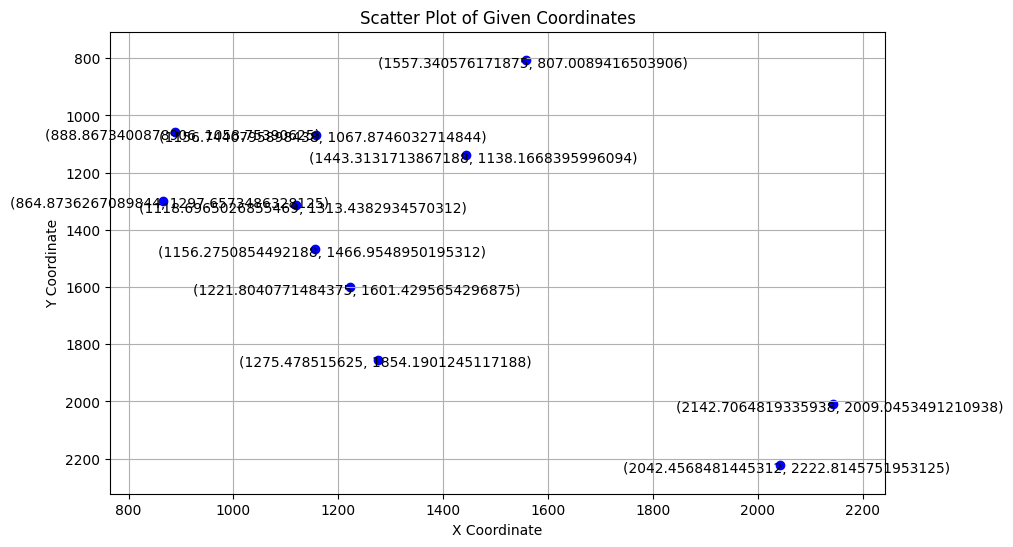

In [ ]:
# Plotting the coordinates
plt.figure(figsize=(10, 6))
plt.scatter(coord[:, 0], coord[:, 1], color='blue', marker='o')
plt.title('Scatter Plot of Given Coordinates')
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')

# Annotating points for clarity
for i, (x, y) in enumerate(coord):
    plt.annotate(f'({x}, {y})', (x, y), textcoords="offset points", xytext=(5,-5), ha='center')

plt.ylim(max(coord[:,1]) + 100, min(coord[:,1]) - 100)
plt.xlim(min(coord[:,0]) - 100, max(coord[:,0]) + 100)
plt.grid(True)
plt.show()

In [ ]:
!pip install gudhi

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 24.5 MB/s eta 0:00:00


Pairwise Distance Matrix:
 [[          0      478.05      1496.6        1337      350.24      669.98      714.31      1084.5      848.67      772.26      862.37]
 [     478.05           0      1455.5      1363.1      295.06      248.49      268.03      795.23      371.47      399.08      537.51]
 [     1496.6      1455.5           0      236.11      1239.1      1296.3      1638.8      850.96      1497.5      1164.7      1029.4]
 [       1337      1363.1      236.11           0        1117      1237.9      1573.3      880.95      1462.5      1125.6      1007.1]
 [     350.24      295.06      1239.1        1117           0      368.91       560.1      735.43      600.02      436.45       513.5]
 [     669.98      248.49      1296.3      1237.9      368.91           0      343.05      563.02      254.31      158.05      305.89]
 [     714.31      268.03      1638.8      1573.3       560.1      343.05           0      884.41      240.11      487.99      636.67]
 [     1084.5      795.23   

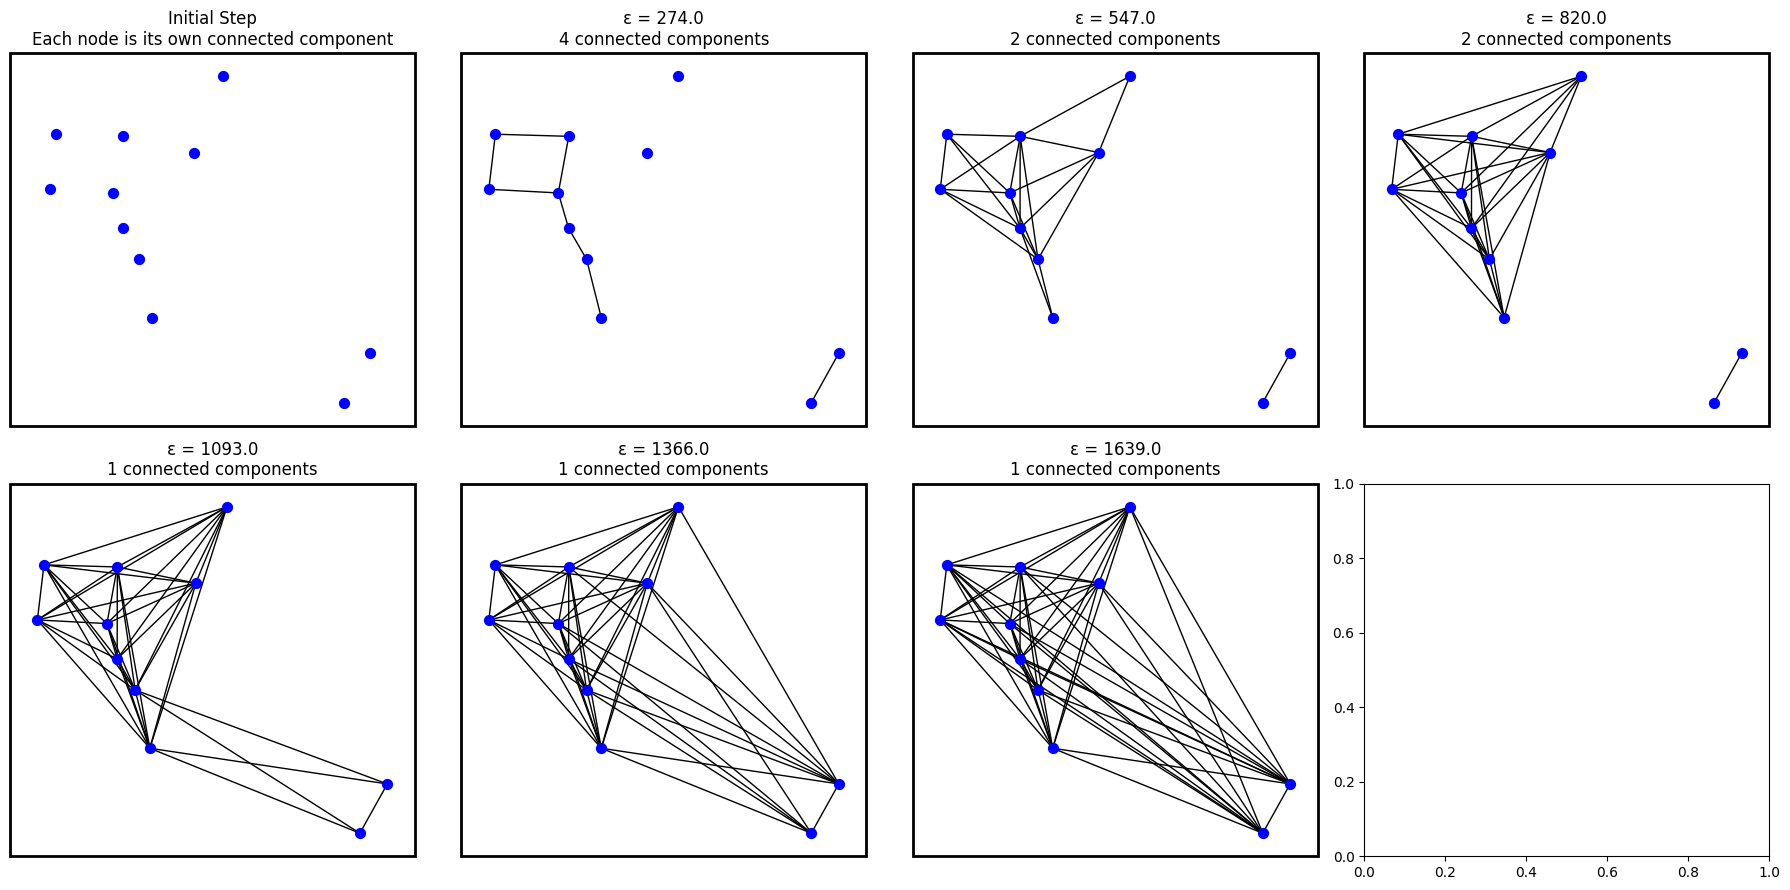

In [ ]:
import numpy as np
import gudhi as gd
import networkx as nx
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from scipy.spatial import distance_matrix

# def generate_point_cloud(n_points=30, seed=0):
#     np.random.seed(seed)
#     return np.random.random((n_points, 2))

def plot_initial_components(points, ax):
    G = nx.Graph()
    for i in range(len(points)):
        G.add_node(i)

    # Plot the graph
    pos = {i: (point[0], point[1]) for i, point in enumerate(points)}
    nx.draw(G, pos, ax=ax, node_color='blue', with_labels=False, node_size=50)
    ax.set_title('Initial Step\nEach node is its own connected component')
    ax.set_ylim(max(points[:,1]) + 100, min(points[:,1]) - 100)
    ax.set_xlim(min(points[:,1]) - 100, max(points[:,1]) + 100)
    # Add border to the plot
    add_border(ax)

def plot_connected_components(points, epsilon, ax):
    # Create Rips complex
    rips_complex = gd.RipsComplex(points=points, max_edge_length=epsilon)
    simplex_tree = rips_complex.create_simplex_tree(max_dimension=1)

    # Create a graph from the Rips complex
    G = nx.Graph()
    for i in range(len(points)):
        G.add_node(i)
    for simplex in simplex_tree.get_skeleton(1):
        if len(simplex[0]) == 2:  # This is an edge
            u, v = simplex[0]
            G.add_edge(u, v)

    # Plot the graph
    pos = {i: (point[0], point[1]) for i, point in enumerate(points)}
    nx.draw(G, pos, ax=ax, node_color='blue', edge_color='black', with_labels=False, node_size=50)
    ax.set_title(f'ε = {epsilon}\n{nx.number_connected_components(G)} connected components')
    ax.set_xlim(min(points[:,0]) - 100, max(points[:,0]) + 100)
    ax.set_ylim(max(points[:,1]) + 100, min(points[:,1]) - 100)
    # Add border
    add_border(ax)

def add_border(ax):
    # Add border around
    rect = Rectangle((0, 0), 1, 1, fill=False, color="black", lw=2, zorder=5,
                     transform=ax.transAxes, clip_on=False)
    ax.add_patch(rect)

def calculate_max_and_avg_pairwise_distance(points):
    # Compute the pairwise distance matrix
    dist_matrix = distance_matrix(points, points)

    # Find the maximum pairwise distance
    max_distance = np.max(dist_matrix)

    # Find the average pairwise distance
    # We need to consider only the upper triangular part of the distance matrix excluding the diagonal
    upper_tri_indices = np.triu_indices_from(dist_matrix, k=1)
    avg_distance = np.mean(dist_matrix[upper_tri_indices])

    return max_distance, avg_distance, dist_matrix

def calculate_epsilon_steps(max_distance, num_steps):
    # Calculate the step size
    step_size = max_distance / (num_steps - 1)
    return np.ceil(np.arange(0, max_distance + step_size, step_size))

# Calculate maximum and average pairwise distances
max_distance, avg_distance, dist_matrix = calculate_max_and_avg_pairwise_distance(coordinate)

print("Pairwise Distance Matrix:\n", dist_matrix)
print("Maximum Pairwise Distance:", max_distance)
print("Average Pairwise Distance:", avg_distance)

# Define the number of epsilon steps
num_steps = 7  # Adjust this value to get between 6 and 8 steps

# Calculate epsilon steps
epsilons = calculate_epsilon_steps(max_distance, num_steps)

print("Epsilon Steps:", epsilons)


# Define epsilons
# epsilons = [0, 200, 400, 600, 800, 1000, 1200, 1400]

# Generate point cloud
# coordinate = generate_point_cloud()

fig, axes = plt.subplots(2, len(epsilons)//2 + 1, figsize=(18, 9))
axes = axes.flatten()

plot_initial_components(coordinate, axes[0])

for i, epsilon in enumerate(epsilons[1:], start=1):
    plot_connected_components(coordinate, epsilon, axes[i])

plt.tight_layout()
plt.show()

In [1]:
# Author: Phyllipe Bezerra (https://github.com/pmba)

clothes = {
    0: "underwear",
    1: "pants",
    2: "belt",
    3: "suit",
    4: "shoe",
    5: "socks",
    6: "shirt",
    7: "tie",
    8: "watch",
}

graph = [[1, 4], [2, 4], [3], [], [], [4], [2, 7], [3], []]

visited = [0 for x in range(len(graph))]
stack = []


def print_stack(stack, clothes):
    order = 1
    while stack:
        current_clothing = stack.pop()
        print(order, clothes[current_clothing])
        order += 1


def depth_first_search(u, visited, graph):
    visited[u] = 1
    for v in graph[u]:
        if not visited[v]:
            depth_first_search(v, visited, graph)

    stack.append(u)


def topological_sort(graph, visited):
    for v in range(len(graph)):
        if not visited[v]:
            depth_first_search(v, visited, graph)


if __name__ == "__main__":
#     topological_sort(graph, visited)
#     print(stack)
#     print_stack(stack, clothes)
#
    import doctest
    doctest.testmod(verbose=True)


PYDEV DEBUGGER WARNING:
sys.settrace() should not be used when the debugger is being used.
This may cause the debugger to stop working correctly.
If this is needed, please check: 
http://pydev.blogspot.com/2007/06/why-cant-pydev-debugger-work-with.html
to see how to restore the debug tracing back correctly.
Call Location:
  File "/usr/lib/python3.10/doctest.py", line 1501, in run
    sys.settrace(save_trace)



4 items had no tests:
    __main__
    __main__.depth_first_search
    __main__.print_stack
    __main__.topological_sort
0 tests in 4 items.
0 passed and 0 failed.
Test passed.
